In [296]:
library(tidyverse)
library(tidymodels)
library(repr)
library(readxl)
options(repr.matrix.max.rows = 6)
library(GGally)
library(ISLR)

In [2]:
download.file("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", destfile = "cleveland_data")

In [59]:
heart_disease_data <- read_delim("cleveland_data", col_names = FALSE, skip=20, delim= ",")
heart_disease_data

Rows: 283 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
64,1,1,110,211,0,2,144,1,1.8,2,0.0,3.0,0
58,0,1,150,283,1,2,162,0,1.0,1,0.0,3.0,0
58,1,2,120,284,0,2,160,0,1.8,2,0.0,3.0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


In [60]:
names(heart_disease_data) <- c("age", "sex", "chest_pain", "resting_bp", "cholesterol", "fasting_blood_sugar", "resting_electro", "max_hr", "ex_angina", "oldpeak", "slope", "ca", "thal", "num")
heart_disease_data <- heart_disease_data |>
#mutate(sex = case_when(sex == 1 ~ "male" , sex == 0 ~ "female"))|>
#mutate(chest_pain = case_when(chest_pain == 1 ~ "typical angina", chest_pain == 2 ~ "atypical angina", chest_pain == 3 ~ "non-anginal pain", chest_pain == 4 ~ "asymptomatic"))|>
#mutate(fasting_blood_sugar = case_when(fasting_blood_sugar == 1 ~ "true" , fasting_blood_sugar == 0 ~ "false"))|>
#mutate(resting_electro = case_when(resting_electro == 0 ~ "normal", resting_electro == 1 ~ "abnormal", resting_electro == 2 ~ "hypertrophy"))|>
#mutate(ex_angina = case_when(ex_angina == 1 ~ "yes" , ex_angina == 0 ~ "no"))|>
#mutate(slope = case_when(slope == 1 ~ "upsloping", slope == 2 ~ "flat", slope == 3 ~ "downsloping"))|>
#mutate(thal = case_when(thal == "3.0" ~ "normal", thal == "6.0" ~ "fixed defect", thal == "7.0" ~ "reversable defect"))|>
mutate(num = case_when(num == 0 ~ "healthy" , num == 1 ~ "sick", num == 2 ~ "sick", num == 3 ~ "sick", num == 4 ~ "sick"))|>
mutate(num = as_factor(num))
heart_disease_data$ca[heart_disease_data$ca == "?"] <- NA
heart_disease_data$thal[heart_disease_data$thal == "?"] <- NA
heart_disease_data

age,sex,chest_pain,resting_bp,cholesterol,fasting_blood_sugar,resting_electro,max_hr,ex_angina,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>
64,1,1,110,211,0,2,144,1,1.8,2,0.0,3.0,healthy
58,0,1,150,283,1,2,162,0,1.0,1,0.0,3.0,healthy
58,1,2,120,284,0,2,160,0,1.8,2,0.0,3.0,sick
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,sick
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,sick
38,1,3,138,175,0,0,173,0,0.0,1,NA,3.0,healthy


In [61]:
heart_disease_data2 <- (na.omit(heart_disease_data))
heart_disease_data2

age,sex,chest_pain,resting_bp,cholesterol,fasting_blood_sugar,resting_electro,max_hr,ex_angina,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>
64,1,1,110,211,0,2,144,1,1.8,2,0.0,3.0,healthy
58,0,1,150,283,1,2,162,0,1.0,1,0.0,3.0,healthy
58,1,2,120,284,0,2,160,0,1.8,2,0.0,3.0,sick
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,sick
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,sick
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,sick


In [70]:
heart_disease_data3 <- heart_disease_data2|>
mutate(thal = as.numeric(thal))|>
mutate(ca = as.numeric(ca))

scaled_recipe_1 <- recipe(num ~ ., data = heart_disease_data3)|>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

heart_data_scaled_1 <- scaled_recipe_1 |>  
    prep() |> 
    bake(heart_disease_data3)
heart_data_scaled_1

age,sex,chest_pain,resting_bp,cholesterol,fasting_blood_sugar,resting_electro,max_hr,ex_angina,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1.034985,0.6981985,-2.248337,-1.1949675,-0.6930261,-0.4040717,1.001856,-0.2187793,1.415489,0.65826822,0.6868786,-0.7358115,-0.8929336,healthy
0.377437,-1.4270869,-2.248337,1.0317798,0.6730258,2.4658737,1.001856,0.5581676,-0.703919,-0.02561475,-0.9821159,-0.7358115,-0.8929336,healthy
0.377437,0.6981985,-1.212082,-0.6382806,0.6919987,-0.4040717,1.001856,0.4718402,-0.703919,0.65826822,0.6868786,-0.7358115,-0.8929336,sick
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
1.4733496,0.6981985,0.8604283,0.69776774,-1.0345391,2.4658737,-1.009116,-0.3482704,-0.703919,2.0260342,0.6868786,1.3873112,1.1639696,sick
0.2678458,0.6981985,0.8604283,-0.08159381,-2.2108616,-0.4040717,-1.009116,-1.4705270,1.415489,0.1453560,0.6868786,0.3257499,1.1639696,sick
0.2678458,-1.4270869,-1.2120816,-0.08159381,-0.2187026,-0.4040717,1.001856,1.0761322,-0.703919,-0.8804685,0.6868786,0.3257499,-0.8929336,sick


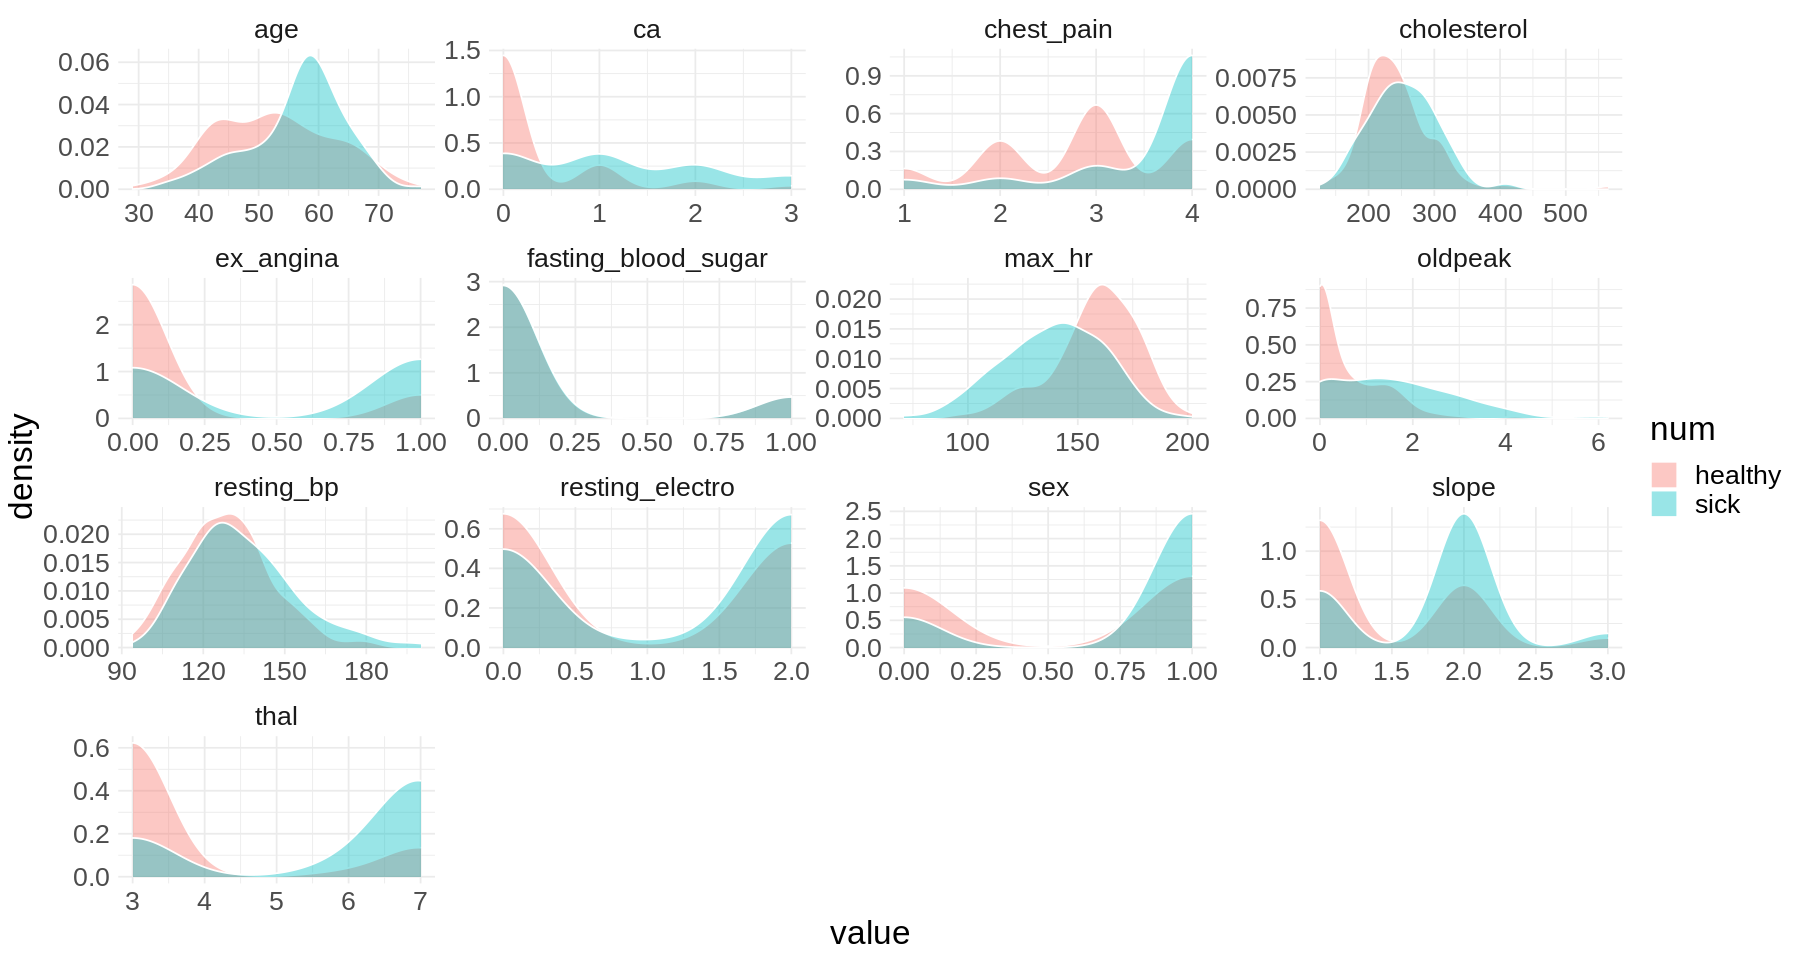

In [207]:
options(repr.plot.height = 8, repr.plot.width = 15)
heart_disease_data3|>
    pivot_longer(cols = -num, names_to = 'category', values_to = 'value')  |> 
    ggplot(aes(value, fill = num)) +
        geom_density(alpha = 0.4, colour = 'white') +
        facet_wrap(facets = vars(category), scales = 'free') +
        theme_minimal() +
        theme(text = element_text(size = 20))

In [264]:
heart_clean <- heart_data_scaled_1 |>
select("age", "sex", "oldpeak", "chest_pain", "thal", "max_hr", "ex_angina", "ca", "num")
heart_clean

age,sex,oldpeak,chest_pain,thal,max_hr,ex_angina,ca,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1.034985,0.6981985,0.65826822,-2.248337,-0.8929336,-0.2187793,1.415489,-0.7358115,healthy
0.377437,-1.4270869,-0.02561475,-2.248337,-0.8929336,0.5581676,-0.703919,-0.7358115,healthy
0.377437,0.6981985,0.65826822,-1.212082,-0.8929336,0.4718402,-0.703919,-0.7358115,sick
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
1.4733496,0.6981985,2.0260342,0.8604283,1.1639696,-0.3482704,-0.703919,1.3873112,sick
0.2678458,0.6981985,0.1453560,0.8604283,1.1639696,-1.4705270,1.415489,0.3257499,sick
0.2678458,-1.4270869,-0.8804685,-1.2120816,-0.8929336,1.0761322,-0.703919,0.3257499,sick


In [265]:
heart_disease_split <- initial_split(heart_clean, prop = 0.75, strata = num)
heart_disease_train <- training(heart_disease_split)
heart_disease_test <- testing(heart_disease_split)

In [266]:
heart_disease_table <- heart_disease_train |>
group_by(num)|>
summarize(chest_pain = mean(chest_pain, na.rm = TRUE),
    thal = mean(thal, na.rm = TRUE),
    ex_angina = mean(ex_angina, na.rm = TRUE),
    oldpeak = mean(oldpeak, na.rm = TRUE),
    sex = mean(sex, na.rm = TRUE),
    ca = mean(ca, na.rm = TRUE),
    age = mean(age, na.rm = TRUE),
    max_hr = mean(max_hr, na.rm = TRUE))
heart_disease_table

num,chest_pain,thal,ex_angina,oldpeak,sex,ca,age,max_hr
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
healthy,-0.3924982,-0.5142764,-0.3956414,-0.4235103,-0.3644442,-0.3883914,-0.2053892,0.3984619
sick,0.4117406,0.5225127,0.4104091,0.3630352,0.3476359,0.5008528,0.2542881,-0.3602850


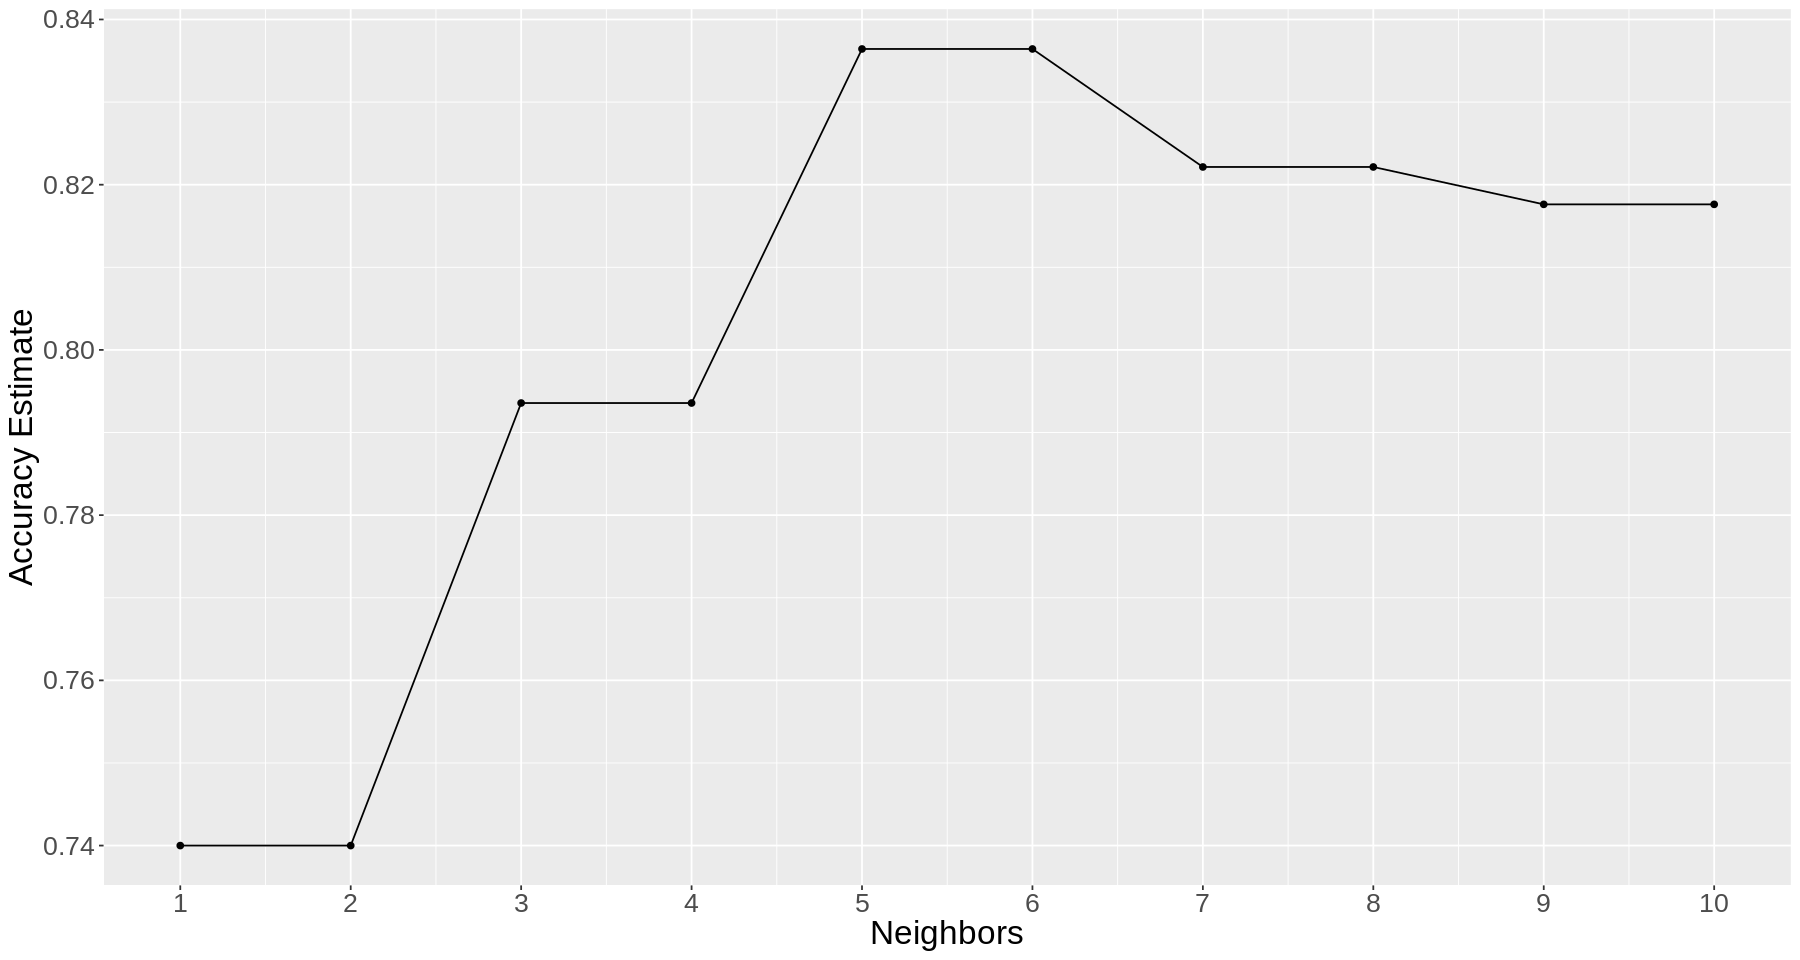

In [267]:
set.seed(2019) 

knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

training_recipe <- recipe(num ~ ., data = heart_disease_train)

training_vfold <- vfold_cv(heart_disease_train, v = 10, strata = num)

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 4) |>
    set_engine("kknn") |>
    set_mode("classification")

training_resample_fit <- workflow() |>
    add_recipe(training_recipe) |>
    add_model(knn_spec) |>
    fit_resamples(resamples = training_vfold)

grid_frame <- tibble(neighbors = (c(1,2,3,4,5,6,7,8,9,10)))

knn_results <- workflow() |>
    add_recipe(training_recipe) |>
    add_model(knn_tune) |>
    tune_grid(resamples = training_vfold, grid = grid_frame) |>
    collect_metrics()

accuracies <- knn_results |> 
    filter(.metric == "accuracy")

cross_val_plot <- ggplot(accuracies, aes(x = neighbors, y = mean))+
    geom_point() +
    geom_line() +
    labs(x = "Neighbors", y = "Accuracy Estimate") +
    scale_x_continuous(breaks = seq(0, 10, by = 1))+
    theme(text = element_text(size = 20))
cross_val_plot

In [274]:
set.seed(2019) 

heart_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 5) |>
    set_engine("kknn") |>
    set_mode("classification")

heart_fit <- workflow() |>
    add_recipe(training_recipe) |>
    add_model(heart_spec) |>
    fit(data = heart_disease_train)
heart_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(5,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.1835749
Best kernel: rectangular
Best k: 5

In [275]:
set.seed(2019) 

heart_predictions <- predict(heart_fit , heart_disease_test) |>
    bind_cols(heart_disease_test)
heart_predictions

heart_metrics <- heart_predictions |>
    metrics(truth = num, estimate = .pred_class)             
heart_metrics

heart_conf_mat <- heart_predictions |> 
    conf_mat(truth = num, estimate = .pred_class)
heart_conf_mat

.pred_class,age,sex,oldpeak,chest_pain,thal,max_hr,ex_angina,ca,num
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
healthy,-1.1568406,0.6981985,-0.53852698,-0.1758267,-0.8929336,1.2919508,1.415489,-0.7358115,healthy
healthy,-1.3760231,0.6981985,-0.88046846,0.8604283,-0.8929336,1.2487870,-0.703919,-0.7358115,healthy
healthy,0.7062108,0.6981985,-0.02561475,-0.1758267,-0.8929336,-0.5209253,1.415489,-0.7358115,healthy
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
sick,0.4870283,0.6981985,-0.02561475,0.8604283,0.6497438,-2.549620,-0.703919,1.3873112,sick
sick,0.2678458,0.6981985,0.14535599,0.8604283,1.1639696,-1.470527,1.415489,0.3257499,sick
healthy,0.2678458,-1.4270869,-0.88046846,-1.2120816,-0.8929336,1.076132,-0.703919,0.3257499,sick


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8285714
kap,binary,0.6593674


          Truth
Prediction healthy sick
   healthy      28    3
   sick          9   30

In [276]:
heart_proportions <- heart_disease_train |>
group_by(num) |>
summarize(n = n()) |>
mutate(percent = 100*n/nrow(heart_disease_train))
heart_proportions

num,n,percent
<fct>,<int>,<dbl>
healthy,110,53.1401
sick,97,46.8599


In [411]:
conf <- structure(c(28, 9, 3, 30, 0.243243243, 0.09090909
), .Dim = 2:3, .Dimnames = list(c("Healthy_p", "Sick_p"), c("Healthy", 
"Sick", "class.error")))
conf

,Healthy,Sick,class.error
Healthy_p,28,3,0.24324324
Sick_p,9,30,0.09090909


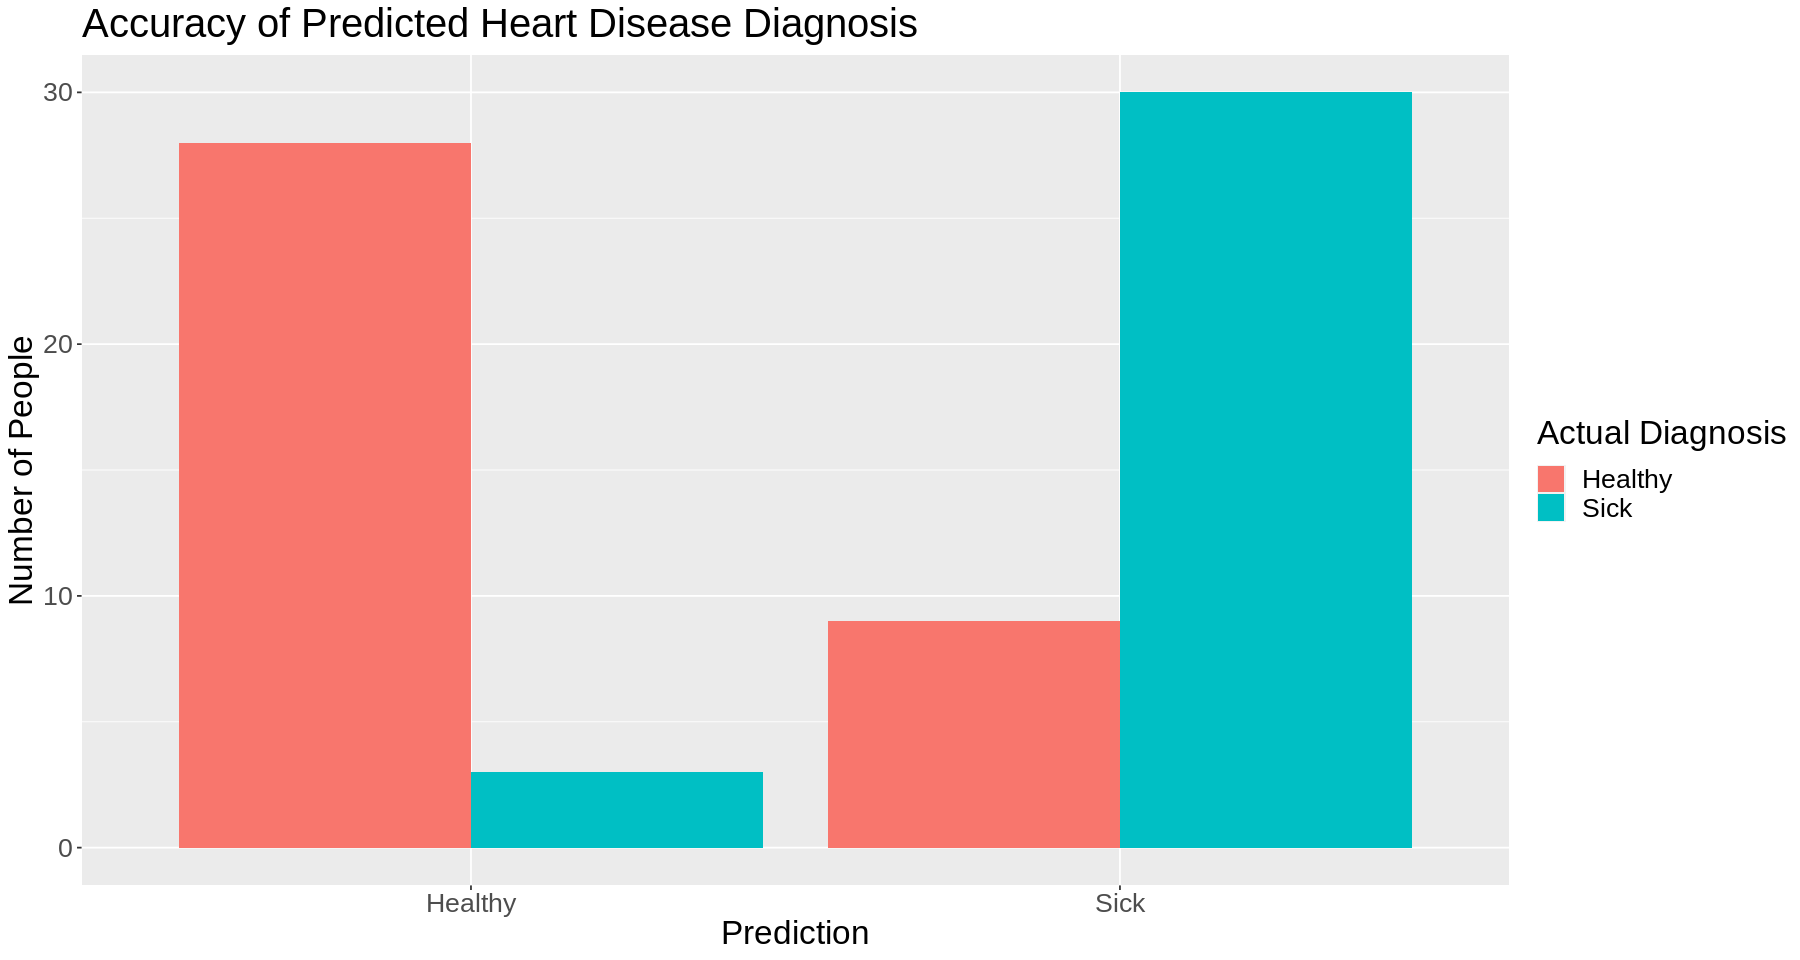

In [452]:
conf_plot <- conf|> 
as.data.frame(conf) |>
select(-class.error)|>
tibble::rownames_to_column("Prediction")|>
mutate(Prediction = case_when(Prediction == 1 ~ "Healthy" , Prediction == 2 ~ "Sick"))|>
pivot_longer(-Prediction, names_to = "Diagnosis")|>
ggplot((aes(x=Prediction,y=value,fill=Diagnosis))) + geom_bar(stat = "identity", position = "dodge") +
ylab("Number of People") +
xlab("Prediction") +
labs(fill = "Actual Diagnosis") +
ggtitle("Accuracy of Predicted Heart Disease Diagnosis") +
theme(text = element_text(size = 20))
print(conf_plot)